<a href="https://colab.research.google.com/github/kennedyconnors/engg680_2024_fall/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 2: Non-linear Least Square Estimation Problem*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Kennedy | Connors | Kennedy Connnors Oct 18,2024 | 4 | 33.3% |
| Member 2: | Regan | Kane | Regan Kane Oct 18 2024 | 4 | 33.3% |
| Member 3: | Manaan | Hamidu| Manaan Hamidu Oct 18 2024 | 4 | 33.3% |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

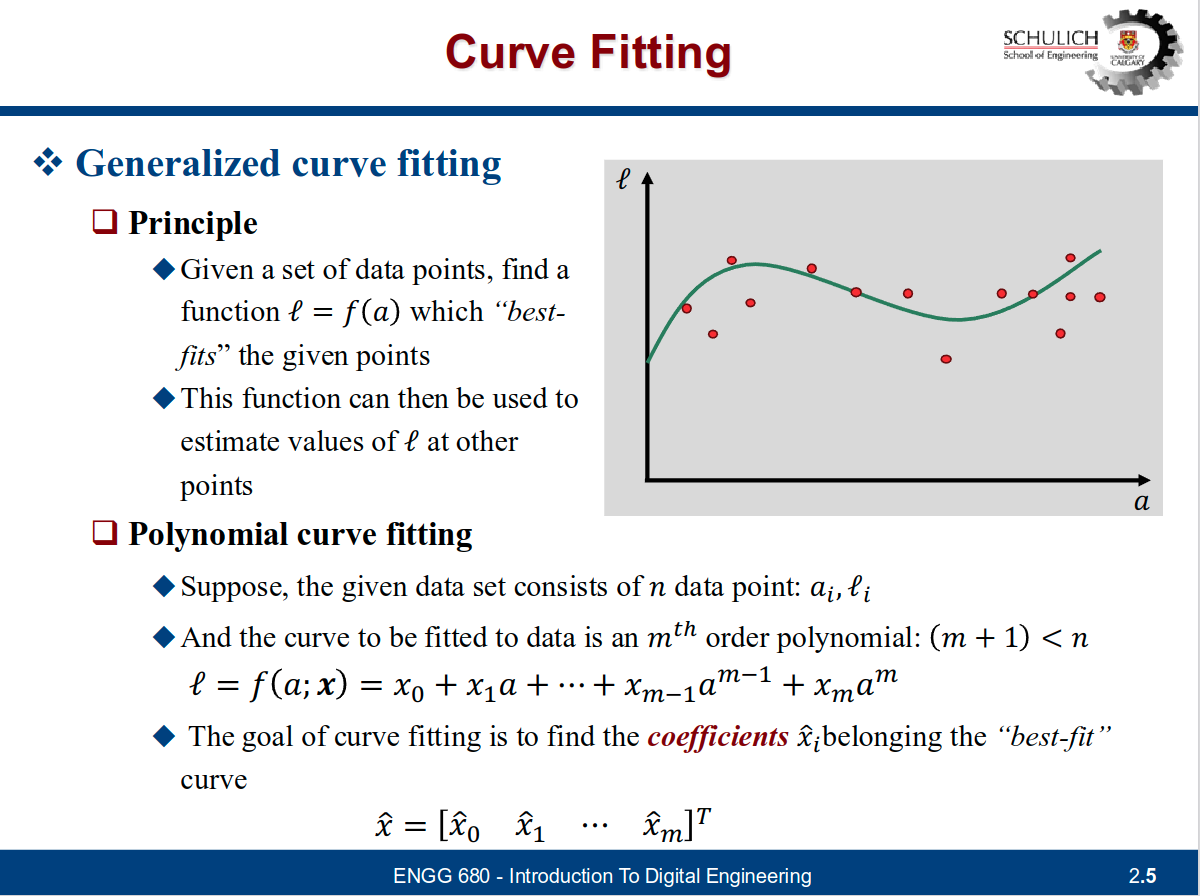

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [ ]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('/content/data.xlsx')
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = np.array(df_data['l'])
l_var = np.array(df_data['l_var'])
l_true = np.array(df_data['l_true'])

In [ ]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


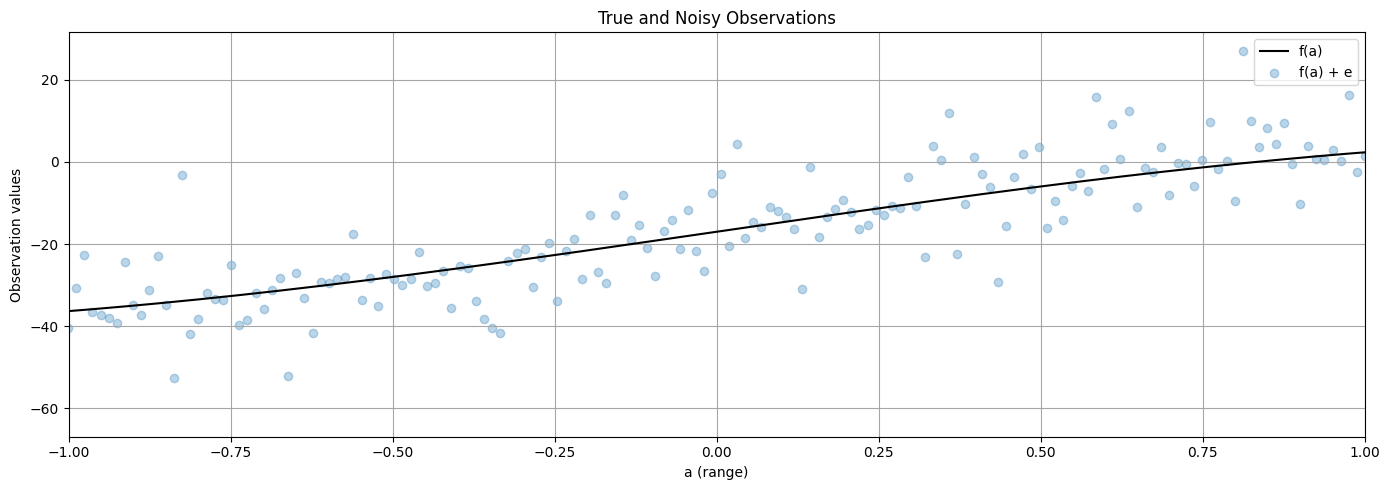

In [ ]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plotting the true observations
ax.plot(a, l_true, label="f(a)", color='k')

# Plotting the noisy observations as a scatter plot
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)

# Setting labels, legend, and title
ax.set_xlabel('a (range)')
ax.set_ylabel('Observation values')
ax.set_title('True and Noisy Observations')
ax.legend()

# Scaling the range of x-axis to -1 to 1
ax.set_xlim([-1, 1])

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [ ]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

  # Construct the design matrix A based on the degree of the polynomial
    A = np.vander(a, deg + 1, increasing=True)  # Vandermonde matrix for polynomial fitting

    # Apply the linear least square estimation formula
    # Weighted least squares: (A^T * P * A)^-1 * A^T * P * l
    # Calculating the inverse term
    AtP = A.T @ P  # A transpose times P
    AtPA_inv = np.linalg.inv(AtP @ A)  # (A^T * P * A)^-1

    # Calculating the estimated coefficients (x)
    x = AtPA_inv @ AtP @ l  # (A^T * P * A)^-1 * A^T * P * l

    # Calculating the observation residuals (v)
    l_est = A @ x  # Estimated observation values
    v = l - l_est  # Residuals (difference between observed and estimated)

    # Calculating the posterior variance factor (apv)
    # apv = v^T * P * v / (n - k), where n = number of observations, k = number of coefficients
    n = len(l)
    k = len(x)
    apv = (v.T @ P @ v) / (n - k)

    # Calculating the covariance matrix of the estimated coefficients (cov_x)
    cov_x = apv * AtPA_inv

    return (x, cov_x, apv, v)

In [ ]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
# ...

# Polynomial degree 1
x_deg1, cov_x_deg1, apv_deg1, v_deg1 = fit_polynomial_curve(a, l, P, deg=1)

# Polynomial degree 3
x_deg3, cov_x_deg3, apv_deg3, v_deg3 = fit_polynomial_curve(a, l, P, deg=3)

# Polynomial degree 5
x_deg5, cov_x_deg5, apv_deg5, v_deg5 = fit_polynomial_curve(a, l, P, deg=5)

# Display the results for each degree
print(f"Degree 1: Coefficients = {x_deg1}, APV = {apv_deg1}")
print(f"Degree 3: Coefficients = {x_deg3}, APV = {apv_deg3}")
print(f"Degree 5: Coefficients = {x_deg5}, APV = {apv_deg5}")


Degree 1: Coefficients = [-16.59352348   7.25633807], APV = 162.742608604322
Degree 3: Coefficients = [-16.72496774  19.63961372   0.03979476  -2.08281013], APV = 66.13227783131883
Degree 5: Coefficients = [-1.65770980e+01  2.28207004e+01 -1.09433276e-01 -3.58096979e+00
  1.75697706e-02  1.36073672e-01], APV = 63.75834463018419


In [ ]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

line_uw = np.polyval(x_deg1[::-1], a)
cubic_uw = np.polyval(x_deg3[::-1], a)
quintic_uw =np.polyval(x_deg5[::-1], a)

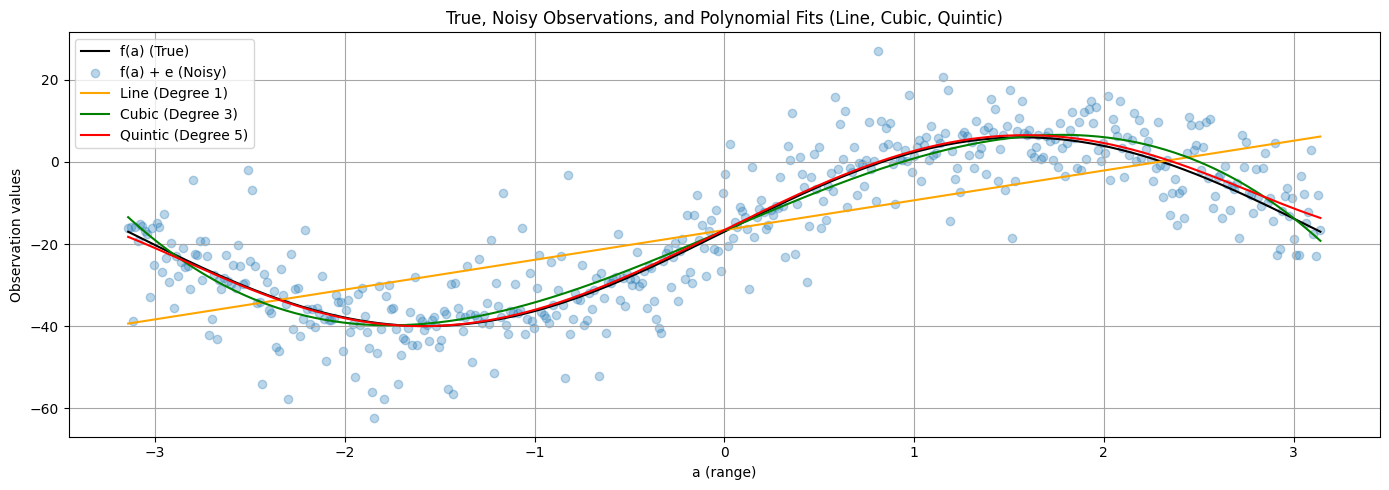

In [ ]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plotting the true observations
ax.plot(a, l_true, label="f(a) (True)", color='k')

# Plotting the noisy observations
ax.scatter(a, l, label="f(a) + e (Noisy)", color='tab:blue', marker='o', alpha=0.3)

# Plotting the polynomial functions
ax.plot(a, line_uw, label="Line (Degree 1)", color='orange')
ax.plot(a, cubic_uw, label="Cubic (Degree 3)", color='green')
ax.plot(a, quintic_uw, label="Quintic (Degree 5)", color='red')

# Adding labels, legend, and title
ax.set_xlabel('a (range)')
ax.set_ylabel('Observation values')
ax.set_title('True, Noisy Observations, and Polynomial Fits (Line, Cubic, Quintic)')
ax.legend()

ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

In [ ]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
print(f"A posterior variance factor for Line (Degree 1): {apv_deg1}")
print(f"A posterior variance factor for Cubic (Degree 3): {apv_deg3}")
print(f"A posterior variance factor for Quintic (Degree 5): {apv_deg5}")


A posterior variance factor for Line (Degree 1): 162.742608604322
A posterior variance factor for Cubic (Degree 3): 66.13227783131883
A posterior variance factor for Quintic (Degree 5): 63.75834463018419


In [ ]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
# Compute the norm (difference) between the predicted and true observations for each polynomial function
norm_line = np.linalg.norm(line_uw - l_true)
norm_cubic = np.linalg.norm(cubic_uw - l_true)
norm_quintic = np.linalg.norm(quintic_uw - l_true)

# Print the computed norms
print(f"Norm between Line (Degree 1) predicted and true observations: {norm_line}")
print(f"Norm between Cubic (Degree 3) predicted and true observations: {norm_cubic}")
print(f"Norm between Quintic (Degree 5) predicted and true observations: {norm_quintic}")

Norm between Line (Degree 1) predicted and true observations: 229.06016796744095
Norm between Cubic (Degree 3) predicted and true observations: 38.28597992911671
Norm between Quintic (Degree 5) predicted and true observations: 17.369967196964648


In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# ...


In [ ]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = #...

SyntaxError: invalid syntax (<ipython-input-12-5f9c863a54e6>, line 5)

In [ ]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# ...


In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# ...

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

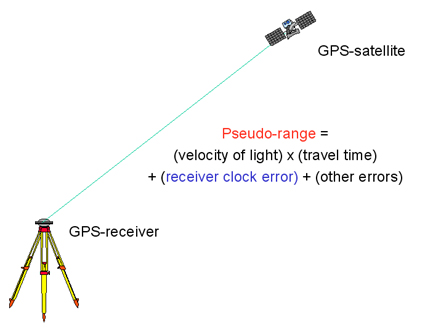

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [ ]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
import pandas as pd
import numpy as np
df_pseudorange = pd.read_excel('./pseudoranges.xlsx')
df_sat_pos = pd.read_excel('./satellite_position.xlsx')

pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()

In [ ]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = 11
m = 4

In [ ]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.eye(n)

In [ ]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)

In [ ]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [ ]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0
arr_w = []
arr_delta = []
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  distances = np.linalg.norm(satellite_pos[:, :3] - receiver_pos, axis=1)
  return distances


In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
    diff = s_pos[:, :3] - r_pos[:3]

    A = np.zeros((len(rho), 4))

    # Fill in the first three columns of A
    A[:, :3] = -diff / rho[:, None]

    # Set the last column to 1 (for the clock bias term)
    A[:, 3] = 1

    return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

while (np.linalg.norm(delta[:3]) >= 0.001):

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = euclidean_norm(x_hat[:3], sat_pos)

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(x_hat, sat_pos, rho)

       pseudorange_corrected = pseudorange[:, 0]

       # compute the misclosure array w
       # (1 marks)
       w = np.diag(P) * (pseudorange_corrected - rho)  # Ensure w is computed correctly

       # compute the corrections delta
       # (1 marks)
       lambda_reg = 1e-6  # A small regularization value
       delta = np.linalg.inv(A.T @ P @ A + lambda_reg * np.eye(A.shape[1])) @ (A.T @ P @ w)

       #delta = np.linalg.inv(A.T @ P @ A) @ (A.T @ P @ w)


       # update the states
       # (1 marks)
       x_hat = x_hat + delta


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
       i += 1

       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(w)
       arr_delta.append(delta)
       arr_err_pos.append(err_pos)
       arr_i.append(i)




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = (w.T @ P @ w) / (len(pseudorange) - len(x_hat))

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = np.linalg.inv(A.T @ P @ A)



In [ ]:
# step 10
print("Results after Convergence:")
print("===========================")
print(f"Estimated States: {x_hat}")
print(f"Corrections Array: {delta}")
print(f"Estimated Measurements Residuals: {w}")  # This is the correct use of w
print(f"A Posteriori Variance of Unit Weight: {apv}")
print(f"Covariance Matrix of Estimated States:\n{C_x_hat}")
print(f"Number of Iterations: {i}")
print(f"3-D Position Error: {err_pos}")


# (7 marks)



Results after Convergence:
Estimated States: [-4.21478087e+08 -1.39755376e+06 -4.37047654e+06 -5.24527156e+12]
Corrections Array: [ 0.00000000e+00  0.00000000e+00 -2.14576721e-06 -4.21906594e+08]
Estimated Measurements Residuals: [-4.22060300e+08 -4.21811299e+08 -4.21998891e+08 -4.21822759e+08
 -4.22046177e+08 -4.21983835e+08 -4.21834374e+08 -4.21868727e+08
 -4.21865773e+08 -4.22049209e+08 -4.21631607e+08]
A Posteriori Variance of Unit Weight: 2.7972249232047805e+17
Covariance Matrix of Estimated States:
[[1.00187060e+06 1.42733946e+00 1.72373332e+00 1.00085304e+06]
 [1.42733946e+00 1.06250650e+02 1.69096207e+01 9.65049184e-01]
 [1.72373332e+00 1.69096207e+01 8.67101998e+01 1.02447224e+00]
 [1.00085304e+06 9.65049184e-01 1.02447224e+00 9.99836611e+05]]
Number of Iterations: 34
3-D Position Error: 419954146.157397


In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)
#The computed Posteriori Value was quite large, which signifies that there is high uncertainty in the variance of the data. A lower value would display highly reliable data that is more unified.
#The Covariance Matrix of estimates states suggests a variety of correlations between the estimated variance states. The values with a power of 10+00 to +02 shows there are lower uncertainties between the data thus is more reliable data. The values with 10+05 to 10+06 show quite a high degree of uncertainty between the variances, thus calls to question the reliability of the data.


' \n '

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)


# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
